In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import gridspec
import socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)

sys.path.append("./Notebooks/Mosaic1000G_Analysis/mosaic_test/")  # Assume we are in Hapsburg Root Directory
#from hmm_inference import HMM_Analyze   # Do not move. Should be after sys.path..

from load_funcs import Summary_ROH_Calls, Summary_ROH_Calls_Error, Summary_ROH_Calls_Missing,\
                       statistics_power_df, calc_power, give_SE,\
                       false_power_statistics, return_calls_only, give_bias, false_positive_nrs
from plot_funcs import plot_power, plot_fp_distribution

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

midway2-0401.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


# Plot power Histograms

## 1) Worst case Power
1.1) First no block merging

In [2]:
bl_lens=[2, 4, 6, 8, 10]
#roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/YRI/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "allRef/", output=1)
roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/TSI6/", 
                        ch=3, nr_iid = 100, 
                        blen_cm = 4, output_prefix = "0999/", output=1)
#roh = Summary_ROH_Calls_Missing(mosaic_folder="./Simulated/1000G_Mosaic/CHB/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "", output=1, missing=0.9)
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 500
Total Nr Called: 670
Total Nr Simulated: 500
Total Nr Called: 727
Total Nr Simulated: 500
Total Nr Called: 733
Total Nr Simulated: 500
Total Nr Called: 765
Total Nr Simulated: 500
Total Nr Called: 774


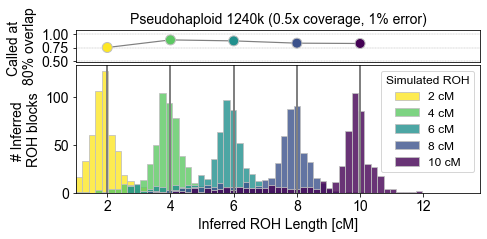

In [11]:
plot_power(bl_lens, df_called, power, title="Pseudohaploid 1240k (0.5x coverage, 1% error)", 
           savepath="./figures/manuscript/mosaic_performance/block_merging/unmerged.pdf", figsize=(7.25,3), ylim_pow=[0.49,1.08],
           fs_l=12, fs=14,
           xlim=[1,13.8])

### 1.2) Gaps merged
Plot in Science column format (x3, 2.25 inch is target)

In [7]:
bl_lens=[4, 6, 8, 10]  # Could add 2
roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/TSI6/", ch=3, nr_iid = 100, 
                        blen_cm = 0, output_prefix = "merged1/", output=1)
df_fp = roh.collect_fp_df()  # Call FPs
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 500
Total Nr Called: 727
Total Nr Simulated: 500
Total Nr Called: 732
Total Nr Simulated: 500
Total Nr Called: 728
Total Nr Simulated: 500
Total Nr Called: 705


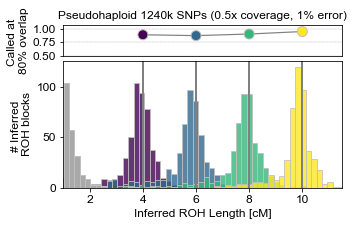

In [10]:
plot_power(bl_lens, df_called, power, df_fp=df_fp,
           figsize=(5,3),   # figsize=(7.25,3)
           title="Pseudohaploid 1240k SNPs (0.5x coverage, 1% error)", 
           savepath="./figures/manuscript/histograms/worst_case_V2.pdf",   
           leg_loc="", hspace=0.06, fs_l=12, fs=12, fs_t=12, cmap="viridis",
           xlim=[1,11.5], ec="silver", color_fp="darkgray", 
           ylim_pow=[0.49,1.08],
           )

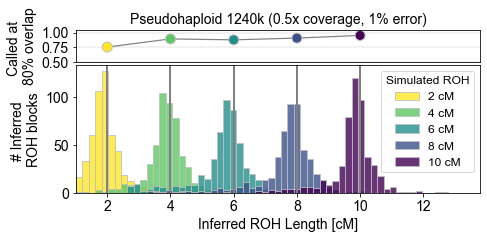

In [16]:
plot_power(bl_lens, df_called, power,
           figsize=(7.25,3),
           title="Pseudohaploid 1240k (0.5x coverage, 1% error)", 
           savepath="./figures/manuscript/mosaic_performance/block_merging/merged.pdf",   #savepath="./figures/manuscript/histograms/worst_case.pdf",
           xlim=[1,13.8], ec="silver", color_fp="darkgray", fs_l=12, fs=14,
          )

# Best case Power
First no block merging

In [2]:
bl_lens=[2, 4, 6, 8, 10]
#roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/YRI/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "allRef/", output=1)
roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/TSI5/", ch=3, nr_iid = 100, 
                        blen_cm = 4, output_prefix = "0999/", output=1)
#roh = Summary_ROH_Calls_Missing(mosaic_folder="./Simulated/1000G_Mosaic/CHB/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "", output=1, missing=0.9)
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 500
Total Nr Called: 673
Total Nr Simulated: 500
Total Nr Called: 661
Total Nr Simulated: 500
Total Nr Called: 641
Total Nr Simulated: 500
Total Nr Called: 668
Total Nr Simulated: 500
Total Nr Called: 659


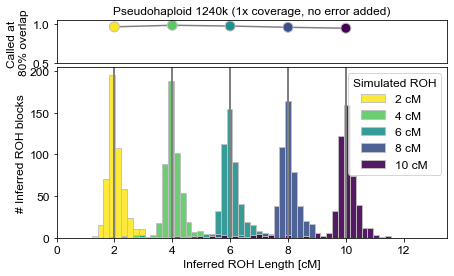

In [6]:
plot_power(bl_lens, df_called, power, title="Pseudohaploid 1240k (1x coverage, no error added)", 
           savepath="", figsize=(7,4), xlim=[0,13.5])

### With Block Merging
Scale 1:3 in Science Paper (2.25 inch wide)

In [2]:
bl_lens=[4, 6, 8, 10]
roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/TSI5/", ch=3, nr_iid = 100, 
                        blen_cm = 0, output_prefix = "merged/", output=1)
df_fp = roh.collect_fp_df()  # Call FPs
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 500
Total Nr Called: 660
Total Nr Simulated: 500
Total Nr Called: 635
Total Nr Simulated: 500
Total Nr Called: 653
Total Nr Simulated: 500
Total Nr Called: 633


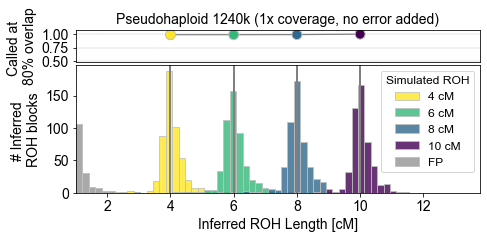

In [3]:
plot_power(bl_lens, df_called, power, df_fp=df_fp,
           figsize=(7.25,3),
           title="Pseudohaploid 1240k (1x coverage, no error added)", 
           savepath="./figures/manuscript/histograms/best_case.pdf", 
           xlim=[1,13.8], ec="silver", color_fp="darkgray", fs_l=12, fs=14,
           ylim_pow=[0.49,1.08],
          )

# For missing Data only (no error added)

In [12]:
bl_lens=[4, 6, 8, 10]
roh = Summary_ROH_Calls_Missing(mosaic_folder="./Simulated/1000G_Mosaic/TSI5/", ch=3, nr_iid = 100, 
                        blen_cm = 0, output_prefix = "merged/", output=1, missing=0.4)
df_fp = roh.collect_fp_df()  # Call FPs
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 500
Total Nr Called: 866
Total Nr Simulated: 500
Total Nr Called: 859
Total Nr Simulated: 500
Total Nr Called: 852
Total Nr Simulated: 500
Total Nr Called: 839


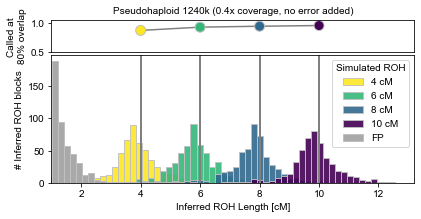

In [15]:
plot_power(bl_lens, df_called, power, df_fp=df_fp,
           title="Pseudohaploid 1240k (0.4x coverage, no error added)", 
           savepath="./figures/manuscript/histograms/best_case.pdf", figsize=(6.5,3), 
           xlim=[1,13.2], ec="silver", color_fp="darkgray", fs_l=10, fs=10,
           alpha=0.9)

# Statistics for results [do not use plots]

### 0.5x coverage + 1% error

In [48]:
bl_lens=[2, 4, 6, 8, 10]
bl_focus = 4 ### Which Statistics to show (when needed)
ch=3
nr_iid=100
folder = "./Simulated/1000G_Mosaic/TSI6/"
output_prefix = "merged1/"
title = "Pseudohaploid 1240k (0.5x coverage, 1% error)"

roh = Summary_ROH_Calls(mosaic_folder=folder, ch=ch, nr_iid = nr_iid, 
                        blen_cm = bl_focus, output_prefix = output_prefix, output=1)
df_power = roh.collect_power_df()

Total Nr Simulated: 500
Total Nr Called: 727


In [50]:
statistics_power_df(df_power, min_frac=0.5)

100 unique Individuals
500 / 500 Blocks called
493 Blocks called > 50.0 %
3.8491 average Block Length cM (called)


In [53]:
bl_lens=[2, 4, 6, 8, 10]
bl_focus = 4 ### Which Statistics to show (when needed)
ch=3
nr_iid=100
folder = "./Simulated/1000G_Mosaic/TSI6/"
output_prefix = "merged1/"

roh = Summary_ROH_Calls(mosaic_folder=folder, ch=ch, nr_iid = nr_iid, 
                        blen_cm = bl_focus, output_prefix = output_prefix, output=1)
df_power = roh.collect_power_df()
statistics_power_df(df_power, min_frac=0.5)
give_SE(df_power)

Total Nr Simulated: 500
Total Nr Called: 727
100 unique Individuals
500 / 500 Blocks called
493 Blocks called > 50.0 %
3.8491 average Block Length cM (called)


0.5958225287911125

In [59]:
bl_lens=[2, 4, 6, 8, 10]
bl_focus = 4 ### Which Statistics to show (when needed)
ch=3
nr_iid=100
folder = "./Simulated/1000G_Mosaic/TSI5/"
output_prefix = "merged/"

roh = Summary_ROH_Calls(mosaic_folder=folder, 
                        ch=ch, nr_iid = nr_iid, 
                        blen_cm = bl_focus, 
                        output_prefix = output_prefix, output=1)
df_power = roh.collect_power_df()
statistics_power_df(df_power, min_frac=0.5)

Total Nr Simulated: 500
Total Nr Called: 660
100 unique Individuals
500 / 500 Blocks called
499 Blocks called > 50.0 %
4.0428 average Block Length cM (called)
